In [35]:
import numpy as np

In [50]:
# нейрон дотстаточно описать весами его нейронов и значением биаса, реализуем это

# Количество весом у нейрона
n = 3

# Генерация случайных весов
W = np.random.rand(n)
b = np.random.rand(1)
W_copy = W.copy()
b_copy = b.copy()

# Количество случайных наборов данных
k = 5

# Генерация случайных наборов данных
X = np.random.rand(k, n)-0.5


In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron_sigmoid_output(inputs, weights, bias):
    # Рассчитываем взвешенную сумму входов
    z = np.dot(inputs, weights) + bias

    # Применяем функцию активации
    output = sigmoid(z)

    return output

def perceptron_class_output(inputs, weights, bias):
 return 1 if np.dot(inputs, weights) + bias > 0.5 else 0
    

In [52]:
# попробуем пропустить через наш нейрон данные 
print(" через сигмоиду ")
for x in X:
    result = perceptron_sigmoid_output(x, W, b)
    print(f"Input: {x}, Output: {result}")
    
print(" через классическую функцию персептрона ")
for x in X:
    result = perceptron_class_output(x, W, b)
    print(f"Input: {x}, Output: {result}")
# персептроны способны классифицировать линейно разделимые образы, и для этого используют функцию как в 
# perceptron_class_output, однако для нейрона можно использовать любые функции активации, и их налажение друг на друга уже будет нейросетью

 через сигмоиду 
Input: [ 2.65042699e-04 -3.24410530e-01 -4.34760108e-01], Output: [0.49980011]
Input: [-0.01647986 -0.20102677  0.11855638], Output: [0.57161639]
Input: [0.4551922  0.4489519  0.10726176], Output: [0.74428814]
Input: [ 0.36987181 -0.37673854 -0.42921917], Output: [0.54345274]
Input: [0.05552707 0.3293205  0.13153546], Output: [0.67954158]
 через классическую функцию персептрона 
Input: [ 2.65042699e-04 -3.24410530e-01 -4.34760108e-01], Output: 0
Input: [-0.01647986 -0.20102677  0.11855638], Output: 0
Input: [0.4551922  0.4489519  0.10726176], Output: 1
Input: [ 0.36987181 -0.37673854 -0.42921917], Output: 0
Input: [0.05552707 0.3293205  0.13153546], Output: 1


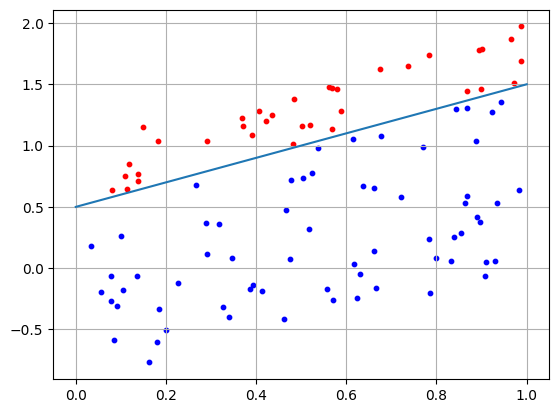

In [53]:
# Решим задачу на  определение положения точки относительно полигона
# удобная функция для создания персептрона, который задает прямую y= k*x + bias

def create_perceptron(k,bias):
    return np.array([-k, 1, -bias])


# позволяет показать нашу гиперплоскость
def draw_line(weights):
    f = [ -w[2]/w[1], -1*w[0]/w[1]-w[2]/w[1]]
    plt.plot(f)

# эта функция рисует разделяющую гиперплоскость а так же данные разделяя их на классы
def draw_line_with_info(X, weights):
    
    def perceptron_class_output(inputs, weights):
         return 1 if np.dot(inputs, weights) >= 0 else 0
        
    draw_line(weights)
    for i in range(N):
        x = np.array([X[0][i], X[1][i], 1])
        y = perceptron_class_output(x, weights)
        if y == 0 :
            plt.scatter(X[0][i], X[1][i], s = 10, c ='blue')
        else:
            plt.scatter(X[0][i], X[1][i], s = 10, c ='red')

#опишем случайное множество точек на [0,1]
N = 100
x1 = np.random.random(N)
x2 = x1 + [(np.random.random()-0.5)*2 for i in range(N)] + 0.01
X = [x1,x2]

w = create_perceptron(1,0.5)

draw_line_with_info(X, w)
plt.grid(True)
plt.show()


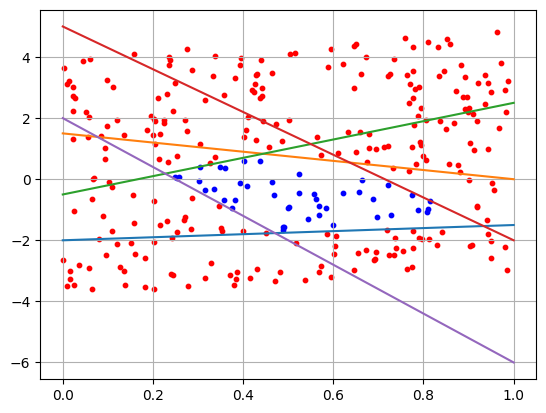

In [121]:
# определим наш полигон

w1 = create_perceptron(0.5 , -2)
w2 = create_perceptron(-1.5, 1.5)
w3 = create_perceptron(3, -0.5)
w4 = create_perceptron(-7, 5)
w5 = create_perceptron(-8, 2)
W_polygon = [w1, w2, w3, w4, w5]

def draw_lines(W):
    for w in W:
      plt.plot([ -w[2]/w[1], -1*w[0]/w[1]-w[2]/w[1]])

#что бы определить наш полигон, нам необходимо что бы различные гиперплоскости что его определяют выдавали классификацию по разному
# "нижние" гиперплоскости должны выдавать 1 когда точка выше их
# "верхние" гиперплоскости должны выдавать 1 когда точка ниже их
# для каждой грани определим является ли она нижней или верхней
Top = [0,1,1,1,0]

def get_points_in_polygon(W,Top, X):

    def perceptron_class_output(inputs, weights):
     return 1 if np.dot(inputs, weights) >= 0 else 0
    
    def reversed_perceptron_class_output(inputs, weights):
     return 0 if np.dot(inputs, weights) >= 0 else 1
    
    draw_lines(W)
    for i in range(N):
        x = np.array([X[0][i], X[1][i], 1])
        bool = []
        for k, w in enumerate(W):
            if Top[k] ==1:
                bool.append(perceptron_class_output(x,w))
            else:
                bool.append(reversed_perceptron_class_output(x,w))
                
        if all(x == 0 for x in bool):
            plt.scatter(X[0][i], X[1][i], s = 10, c ='blue')
        else:
            plt.scatter(X[0][i], X[1][i], s = 10, c ='red')
        bool = []

N = 300
x1 = np.random.random(N)
x2 = x1 + [(np.random.random()-0.5)*8 for i in range(N)] + 0.01
X = [x1, x2]

get_points_in_polygon(W_polygon, Top, X)

plt.grid(True)
plt.show()

2016


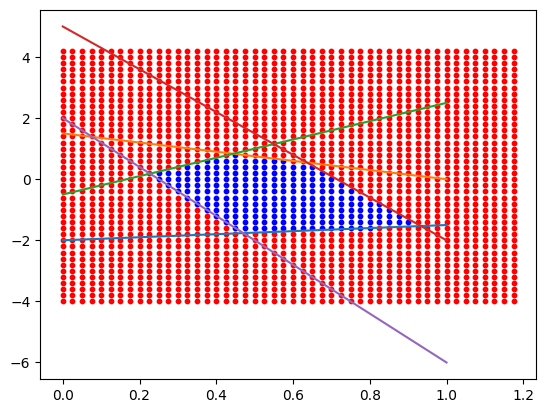

In [134]:
x_range = np.arange(0, 1.2, 0.025) 
y_range = np.arange(-4, 4.4, 0.2) 

points = [(x, y) for x in x_range for y in y_range]

def get_points_in_polygon(W,Top, X):

    def perceptron_class_output(inputs, weights):
     return 1 if np.dot(inputs, weights) >= 0 else 0
    
    def reversed_perceptron_class_output(inputs, weights):
     return 0 if np.dot(inputs, weights) >= 0 else 1
    
    draw_lines(W)
    pepe = round((1.2/0.025)*(8.4/0.2))
    print(pepe)
    for i in range(pepe):
        x = np.array([X[i][0], X[i][1], 1])
        bool = []
        for k, w in enumerate(W):
            if Top[k] ==1:
                bool.append(perceptron_class_output(x,w))
            else:
                bool.append(reversed_perceptron_class_output(x,w))
                
        if all(x == 0 for x in bool):
            plt.scatter(X[i][0], X[i][1], s = 10, c ='blue')
        else:
            plt.scatter(X[i][0], X[i][1], s = 10, c ='red')
        bool = []
get_points_in_polygon(W_polygon, Top, points)

In [55]:
#попробуем обучить нашу нейронную сеть

#пусть у нас есть некоторая обучающая выборка данных
X_train = np.random.rand(k, n)
X_test = np.random.rand(k, n)

# и их соответствующие метки классов (0 или 1)
y_train = np.random.randint(2, size=k)
y_test = np.random.randint(2, size=k)

In [56]:
# процесс обучения лучше виден для сигмоидальной функции, так что напишем для нее простую градиентную тренировку

def compute_sigmoidal_test_error(X_test, y_test, W, b):
    total_error = 0

    for i in range(len(X_test)):
        output = perceptron_sigmoid_output(X_test[i], W, b)
        error = y_test[i] - output
        total_error += abs(error)

    return total_error

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def simple_gradient_train(epochs, X_train, y_train, W, b, learning_rate, X_test =None, y_test=None):
    k, n = X_train.shape  # Получаем размерности X_train

    first_error = 0
    # Создаем список для сохранения ошибок на каждой эпохе
    train_errors = []
    test_errors = []

    for epoch in range(epochs):
        total_train_error = 0  # Суммарная ошибка на обучающей выборке на текущей эпохе
        for i in range(k):
            # Вычисление выхода нейросети
            inputs = X_train[i]
            output = perceptron_sigmoid_output(inputs, W,b)
        
             # Вычисление ошибки с использованием производной сигмоидной функции
            error = y_train[i] - output
            total_train_error += abs(error)
            
            # Обновление весов и смещения с помощью градиентного спуска
            gradient = error * sigmoid_derivative(output)
            W += learning_rate * gradient * inputs
            b += learning_rate * gradient
        
        if X_test is not None:
            total_test_error = compute_sigmoidal_test_error(X_test, y_test, W, b)
            test_error_rounded = np.round(total_test_error, 4)
            test_errors.append(test_error_rounded)
        total_train_error_rounded = np.round(total_train_error, 4)   
        train_errors.append(total_train_error_rounded)


        if X_test is not None:
            print(f"Epoch {epoch + 1}/{epochs}, Train Error: {total_train_error_rounded}, Test Error: {test_error_rounded}")
        else:
            print(f"Epoch {epoch + 1}/{epochs}, Train Error: {total_train_error_rounded}")
            
    if X_test is not None:
        return W, b, train_errors,test_errors
    else:
         return W, b, train_errors





In [57]:
W, b, train_errors, test_errors = simple_gradient_train(1000, X_train, y_train, W=W, b=b, learning_rate=0.1, X_test = X_test, y_test = y_test)

Epoch 1/1000, Train Error: [2.7547], Test Error: [2.3548]
Epoch 2/1000, Train Error: [2.7424], Test Error: [2.368]
Epoch 3/1000, Train Error: [2.73], Test Error: [2.3809]
Epoch 4/1000, Train Error: [2.7176], Test Error: [2.3935]
Epoch 5/1000, Train Error: [2.7054], Test Error: [2.4058]
Epoch 6/1000, Train Error: [2.6932], Test Error: [2.4177]
Epoch 7/1000, Train Error: [2.6812], Test Error: [2.4292]
Epoch 8/1000, Train Error: [2.6694], Test Error: [2.4402]
Epoch 9/1000, Train Error: [2.6578], Test Error: [2.4508]
Epoch 10/1000, Train Error: [2.6465], Test Error: [2.461]
Epoch 11/1000, Train Error: [2.6354], Test Error: [2.4707]
Epoch 12/1000, Train Error: [2.6247], Test Error: [2.4799]
Epoch 13/1000, Train Error: [2.6142], Test Error: [2.4886]
Epoch 14/1000, Train Error: [2.6041], Test Error: [2.4969]
Epoch 15/1000, Train Error: [2.5943], Test Error: [2.5047]
Epoch 16/1000, Train Error: [2.5848], Test Error: [2.5121]
Epoch 17/1000, Train Error: [2.5756], Test Error: [2.5191]
Epoch 18/1

In [58]:
#Тут можно заметить как изменилась наша W
print("weights before: \n", W)
print("weights after: \n", W_copy)

print("bias before: \n", b)
print("bias after: \n", b_copy)

weights before: 
 [ 3.64489033 -2.00361223  0.40115393]
weights after: 
 [0.57939358 0.78582173 0.36505839]
bias before: 
 [-2.08835345]
bias after: 
 [0.41268856]


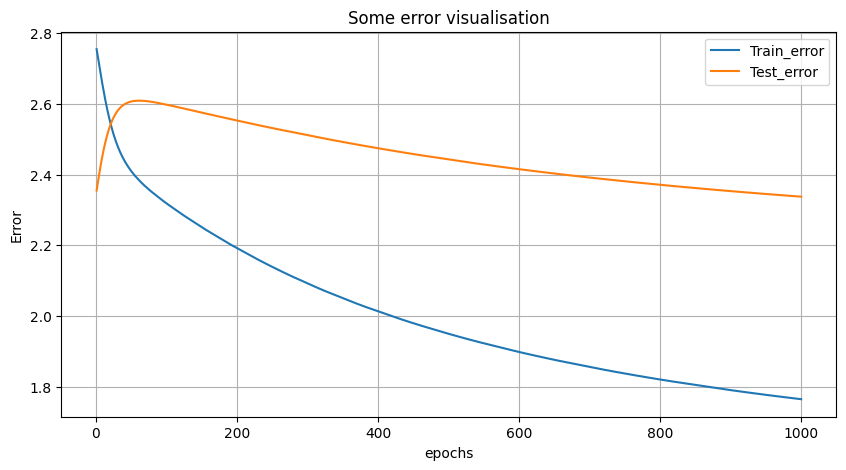

In [59]:
# Визуализируем процесс обучения
import matplotlib.pyplot as plt

epochs = range(1, 1001)        # Список номеров эпох
def do_plot(epochs,train_errors,test_errors):
    # Построение графика ошибок на обучающем и тестовом наборах
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_errors, label='Train_error')
    plt.plot(epochs, test_errors, label='Test_error')
    plt.xlabel('epochs')
    plt.ylabel('Error')
    plt.title('Some error visualisation')
    plt.legend()
    plt.grid(True)
    plt.show()

do_plot(epochs,train_errors,test_errors)

In [73]:
#теперь напишем более сложную и продвинутую функцию обучения

def compute_class_test_error(X_test, y_test, W, b):
    total_error = 0

    for i in range(len(X_test)):
        output = perceptron_class_output(X_test[i], W, b)
        error = y_test[i] - output
        total_error += abs(error)

    return total_error


def gradient_class_train(epochs, X_train, y_train, W, b, learning_rate, batch_size, X_test =None, y_test=None, shuffle=False, printAll = True):
    k, n = X_train.shape  # Получаем размерности X_train
    num_batches = k // batch_size  # Вычисляем количество мини-пакетов

    first_error = 0
    # Создаем список для сохранения ошибок на каждой эпохе
    train_errors = []
    test_errors = []

    for epoch in range(epochs):
        if shuffle:
            # Перемешиваем данные перед каждой эпохой, если указан параметр shuffle=True
            indices = np.arange(k)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

        total_train_error = 0  # Суммарная ошибка на обучающей выборке на текущей эпохе

        for batch in range(num_batches):
            # Выбираем мини-пакет данных
            start = batch * batch_size
            end = (batch + 1) * batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            for i in range(batch_size):
                # Вычисляем выход персептрона для каждого элемента мини-пакета
                output = perceptron_class_output(X_batch[i], W, b)

                # Вычисляем ошибку
                error = y_batch[i] - output

                # Обновляем веса и биас с помощью градиентного спуска
                # При такой функции градиентом просто является ошибка
                W += learning_rate * error * X_batch[i]
                b += learning_rate * error

                # Суммируем ошибку для текущего наблюдения
                total_train_error += abs(error)

        # Вычисляем ошибку на тестовой выборке
        if X_test is not None:
            total_test_error = compute_class_test_error(X_test, y_test, W, b)
            test_error_rounded = np.round(total_test_error, 4)
            test_errors.append(test_error_rounded)

        # Округляем ошибку 
        total_train_error_rounded = np.round(total_train_error, 4)   
        train_errors.append(total_train_error_rounded)
        
        if first_error == 0:
            first_error = total_train_error_rounded
            print(" the first error is : ", first_error)
       

        # Выводим округленные ошибки на текущей эпохе
        if printAll:
            if X_test is not None:
                print(f"Epoch {epoch + 1}/{epochs}, Train Error: {total_train_error_rounded}, Test Error: {test_error_rounded}")
            else:
                print(f"Epoch {epoch + 1}/{epochs}, Train Error: {total_train_error_rounded}")
                
    if X_test is not None:    
        print(f" Finally , Train Error: {total_train_error_rounded}, Test Error: {test_error_rounded}")
        return W, b, train_errors,test_errors
    else:
         print(f" Finally , Train Error: {total_train_error_rounded}")
         return W, b, train_errors


         

In [92]:
W = np.random.rand(n)
W1 = W.copy()

W, b, train_errors, test_errors = gradient_class_train(200, X_train, y_train, W=W, b=b, learning_rate=0.01, batch_size = 1, X_test = X_test, y_test = y_test, shuffle = True)

 the first error is :  2
Epoch 1/200, Train Error: 2, Test Error: 3
Epoch 2/200, Train Error: 2, Test Error: 3
Epoch 3/200, Train Error: 2, Test Error: 3
Epoch 4/200, Train Error: 2, Test Error: 4
Epoch 5/200, Train Error: 2, Test Error: 4
Epoch 6/200, Train Error: 2, Test Error: 4
Epoch 7/200, Train Error: 2, Test Error: 4
Epoch 8/200, Train Error: 3, Test Error: 3
Epoch 9/200, Train Error: 3, Test Error: 3
Epoch 10/200, Train Error: 3, Test Error: 3
Epoch 11/200, Train Error: 2, Test Error: 3
Epoch 12/200, Train Error: 2, Test Error: 3
Epoch 13/200, Train Error: 2, Test Error: 3
Epoch 14/200, Train Error: 2, Test Error: 3
Epoch 15/200, Train Error: 2, Test Error: 3
Epoch 16/200, Train Error: 2, Test Error: 3
Epoch 17/200, Train Error: 2, Test Error: 3
Epoch 18/200, Train Error: 2, Test Error: 3
Epoch 19/200, Train Error: 2, Test Error: 3
Epoch 20/200, Train Error: 2, Test Error: 3
Epoch 21/200, Train Error: 2, Test Error: 3
Epoch 22/200, Train Error: 2, Test Error: 3
Epoch 23/200, Tr

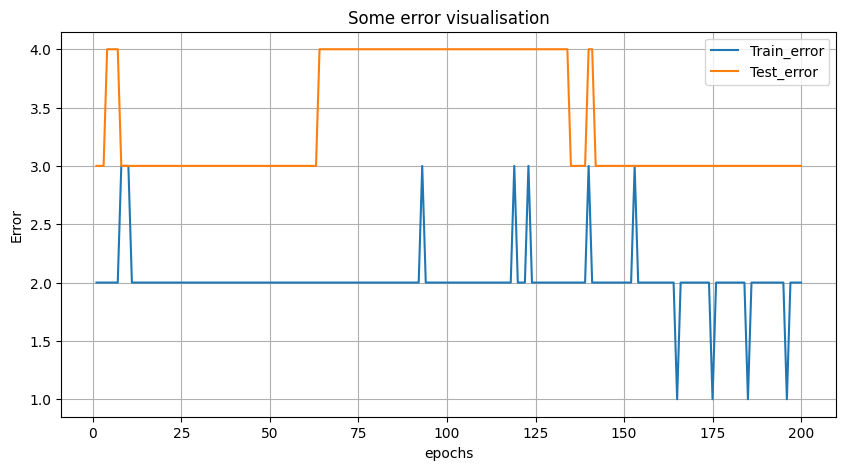

In [100]:
do_plot(range(1, 201), train_errors,test_errors)

In [1162]:
#
#############################################
#
# Авторская задача на использование персептрона
#
##############################################
# Вы отец девочки, и вы хотите ей выбрать мужа, однако есть некоторая проблема
# ваша дочь патологический лжец и вы не можете узнать ее предпочтения
# при этом у нее множественное раздвоение личности (5 личностей)
#
# Вам необходимо узнать предпочтения всех ее личностей, что бы подобрать хорошего мужа, который будет удовлетрорять всех ее личностей
#
# Для этого вы познакомили ее с 1000 кандидатами и узнали каким из ее личностей понравились каждые из этих вариантов
#
# будем считать что каждая из ее личностей это персептрон, на вход он получает параметры кандидата
# это будет [ на сколько он богат, красив, умен, силен, вежлив, верный, интересный ]
# соответственно каждая из ее личностей по разному интересуется этими различными параметрами и персептрон
# выдает 0 если не нравится, и 1 если нравится
##########


In [101]:
#################################################### Cоставляем Дано #######################################################################

# (решающий задачу такое знать не должен, это используется для составления дано по задаче и проверки эффективности решения
# составим модель предпочтений для личностей нашей дочери 

#[ богат, красив, умен, силен, вежлив, верный, интересный ]

# romantic girl
w1 = np.array([-10, 8, -2, 8, 10, 10, 8])
# intellectual girl
w2 = np.array([4, 8, 10, -8, 10, 9, 5])
# party girl
w3 = ([10, 10, -10, 6, -2, -8, 0])
# nervous girl
w4 = np.array([0, -8, 5, 5, 6, 10, -4])
# dominant girl
w5 = np.array([5, -10, 2, 5, -3, 6, 5])

W = [w1,w2,w3,w4,w5]

#по этим данным мы узнаем результаты самых разных парней и запомним их, это нам будет как ДАНО
# все характеристики будут от -1 до 1
X_parameters = np.random.rand(100,7)*2
X_parameters -= 1
#print(np.round(X_parameters, 4))


# узнаем какие парни понравились первой ее личности
#y_answers_w1 = np.array([perceptron_class_output(x, w1,0 ) for x in X_parameters])

# Создание двумерного массива Y_answers, где в Y_answers[0] находятся предпочтения по первой личности, в [4] по 5ой 
Y_answers = np.zeros((len(W), X_parameters.shape[0]), dtype=int)


for i, weights in enumerate(W):
    Y_answers[i] = np.array([perceptron_class_output(x, weights, 0) for x in X_parameters])

In [102]:
# Решение задачи 

# составим свою нейросеть с случайными весами, для будущего определения весов
W = np.random.rand(5,7)*20 -10

# попробуем рассчитать предпочтения разных личностей дочери согласно собранным данным
print("первая личность")
new_w1, b1, train_error = gradient_class_train(1000, X_parameters, Y_answers[0], W=W[0], b=0,
                                                           learning_rate=0.2, batch_size = 10, printAll = False)
print("вторая личность")
new_w2, b2, train_error = gradient_class_train(1000, X_parameters, Y_answers[1], W=W[1], b=0,
                                                           learning_rate=0.2, batch_size = 10, printAll = False)
print("третья личность")
new_w3, b3, train_error = gradient_class_train(1000, X_parameters, Y_answers[2], W=W[2], b=0,
                                                           learning_rate=0.2, batch_size = 10, printAll = False)
print("четвертая личность")
new_w4, b4, train_error = gradient_class_train(1000, X_parameters, Y_answers[3], W=W[3], b=0,
                                                           learning_rate=0.2, batch_size = 10, printAll = False)
print("пятая личность")
new_w5, b5, train_error = gradient_class_train(1000, X_parameters, Y_answers[4], W=W[4], b=0,
                                                           learning_rate=0.2, batch_size = 10, printAll = False)


первая личность
 the first error is :  56
 Finally , Train Error: 0
вторая личность
 the first error is :  54
 Finally , Train Error: 0
третья личность
 the first error is :  42
 Finally , Train Error: 0
четвертая личность
 the first error is :  46
 Finally , Train Error: 0
пятая личность
 the first error is :  35
 Finally , Train Error: 0


In [103]:
ratios = []


for i in range(len(new_w1)):
    ratio = w1[i] / new_w1[i]
    #print(abs(ratio))
    if(abs(ratio)>0):
        ratios.append(ratio)

# Вычисляем среднее значение отношений
average_ratio = sum(ratios) / len(ratios)

print("значения полученные от обучения \n", [round(x, 3) for x in new_w1])
print("реальные данные\n", w1+0.00)
print("значения умноженные на средний коеффицент отношения к реальным\n",[round(x, 2) for x in new_w1*average_ratio])

#отсюда можно заметить что попытка воссоздать модель нашей дочери по ответам получилась весьма неплохо
#так же тут видно свойство что все веса могут быть домножены на одинаковый коеффицент и мы получим одинаковую модель

значения полученные от обучения 
 [-3.169, 2.244, -0.473, 2.186, 3.141, 2.945, 2.59]
реальные данные
 [-10.   8.  -2.   8.  10.  10.   8.]
значения умноженные на средний коеффицент отношения к реальным
 [-10.99, 7.78, -1.64, 7.58, 10.9, 10.21, 8.98]


In [111]:
#зная то как устроены прредпочтения нашей дочери мы уже можем решить эту задачу аналитически (если она решаема)/
# однако мы попробуем ее решить ее через градиентный спуск

New_W = [new_w1,new_w2,new_w3,new_w4,new_w5]
New_B = [b1,b2,b3,b4,b5]

outputs = []

#возьмем мужа с случайными параметами
our_try = np.random.rand(7)-0.5

outputs = []
# узнаем нравится ли он личностям нашей дочери
for i, neuron_weights in enumerate(New_W):
    output_neuron = perceptron_class_output(our_try, neuron_weights, New_B[i])
    outputs.append(output_neuron)

print( "для парня с параметрами \n", [round(x, 3) for x in our_try])
print( "дочь отвечает таким образом: ", outputs)


# теперь нам нужно решить, что бы  sigmoid(np.dot(our_try, weights)) > 0.5
# это так же можно решить через градиентный спуск

def gradient_descent_for_husband(our_try, weights,biases ,learning_rate, iterations):
    for _ in range(iterations):
        gradient = np.zeros_like(our_try)
        for i, weight in enumerate(weights):
            result = perceptron_sigmoid_output(our_try, weight, biases[i])
            gradient += (result - 0.5) * result * (1 - result) * weight - biases[i] 
        our_try -= learning_rate * gradient
    return our_try


# Вызываем функцию градиентного спуска
print("\n оптимизируем параметры \n")
optimized_our_try = gradient_descent_for_husband(our_try, New_W, New_B, learning_rate = 0.2 , iterations = 100)

outputs = []
for i, neuron_weights in enumerate(New_W):
    output_neuron = perceptron_class_output(optimized_our_try, neuron_weights, New_B[i])
    outputs.append(output_neuron)
    
print( "для парня с параметрами \n", [round(x, 3) for x in optimized_our_try])
print( "дочь отвечает таким образом: ", outputs)


для парня с параметрами 
 [-0.444, 0.05, 0.24, -0.05, -0.4, 0.248, 0.159]
дочь отвечает таким образом:  [1, 0, 0, 0, 1]

 оптимизируем параметры 

для парня с параметрами 
 [23.412, 24.261, 24.152, 23.724, 23.528, 23.983, 24.051]
дочь отвечает таким образом:  [1, 1, 1, 1, 1]


In [1167]:
# таким образом мы решили задачу и нашли тот вариант (что не всегда удастстя с использованием градиентого спуска),
# который понравится всем, однако этот вариает весьма средний 
# и то что мы его нашли, лишь является одним из локальным минимумов, таким образом градиентным спуском мы находим не самый оптиммальный вариант
# такие задачи, где известны веса моделей и параметров не столь много, лучше решать аналитически